In [1]:
import time
import pandas as pd

# 1. 读入主题挖掘后的数据

In [2]:
df = pd.read_csv('LDA_clustered_5_detail.csv', encoding='gb18030')
df.head()

,id,statdate,text,所属分类
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息
1,1150,2017/4/27,转发,热带风暴：台风中心消息
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息


In [3]:
df.shape

(7428, 4)

# 2. 文本内容特征标记

In [4]:
df.loc[df.text.str.contains('天晴'), '预报内容'] = '天晴'
df.loc[df.text.str.contains('多云'), '预报内容'] = '多云'
df.loc[df.text.str.contains('小雨'), '预报内容'] = '小雨'
df.loc[df.text.str.contains('阵雨'), '预报内容'] = '阵雨'
df.loc[df.text.str.contains('雷阵雨'), '预报内容'] = '雷阵雨'

df.loc[df.text.str.contains('高温'), '预警内容'] = '高温'
df.loc[df.text.str.contains('台风'), '预警内容'] = '台风'
df.loc[df.text.str.contains('暴雨'), '预警内容'] = '暴雨'
df.loc[df.text.str.contains('寒冷'), '预警内容'] = '寒冷'

df.loc[df.text.str.contains('正常'), '预警级别'] = '正常'
df.loc[df.text.str.contains('黄色'), '预警级别'] = '黄色'
df.loc[df.text.str.contains('红色'), '预警级别'] = '红色'
df.loc[df.text.str.contains('橙色'), '预警级别'] = '橙色'

df.loc[(df.text.str.contains('预警')) & (~df.text.str.contains('解除')), '预警信号'] = '发布预警'
df.loc[(df.text.str.contains('预警')) & (df.text.str.contains('解除')), '预警信号'] = '解除预警'

df.loc[df.text.str.contains('转发'), '微博种类'] = '转发微博'
df.loc[~df.text.str.contains('转发'), '微博种类'] = '原创微博'

df.loc[df.text.str.contains('http'), '是否包含链接'] = '包含链接'
df.loc[~df.text.str.contains('http'), '是否包含链接'] = '不包含链接'

df

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接


In [5]:
df.loc[df.text.str.contains('越秀'), '越秀区'] = '越秀区'
df.loc[df.text.str.contains('海珠'), '海珠区'] = '海珠区'
df.loc[df.text.str.contains('荔湾'), '荔湾区'] = '荔湾区'
df.loc[df.text.str.contains('天河'), '天河区'] = '天河区'
df.loc[df.text.str.contains('白云'), '白云区'] = '白云区'
df.loc[df.text.str.contains('黄埔'), '黄埔区'] = '黄埔区'
df.loc[df.text.str.contains('花都'), '花都区'] = '花都区'
df.loc[df.text.str.contains('番禺'), '番禺区'] = '番禺区'
df.loc[df.text.str.contains('南沙'), '南沙区'] = '南沙区'
df.loc[df.text.str.contains('从化'), '从化区'] = '从化区'
df.loc[df.text.str.contains('增城'), '增城区'] = '增城区'
df

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,海珠区,荔湾区,天河区,白云区,黄埔区,花都区,番禺区,南沙区,从化区,增城区
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,海珠区,荔湾区,天河区,白云区,黄埔区,花都区,番禺区,南沙区,从化区,增城区
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# import re
# a = "abc[123]abc"
# b = re.match(r"(.*)\[([^\[\]]*)\](.*)",a,re.I|re.M)
# (.*)\[([^\[\]]*)\](.*)
# [([^\[\]]*)\]

# c = '[月亮]'
# d = re.match(r"\[([^\[\]]*)\]",c,re.I|re.M)
# d.group()

# b.group()

# b.group(1)

# b.group(2)

In [89]:
# df.loc[(df.text.str.contains('越秀')) | 
#        (df.text.str.contains('海珠')) | 
#        (df.text.str.contains('荔湾')) | 
#        (df.text.str.contains('天河')) | 
#        (df.text.str.contains('白云')) |
#        (df.text.str.contains('黄埔')) | 
#        (df.text.str.contains('花都')) | 
#        (df.text.str.contains('番禺')) | 
#        (df.text.str.contains('南沙')) |
#        (df.text.str.contains('从化')) | 
#        (df.text.str.contains('增城')), '行政区划'] = '多个区'

# df.groupby(df.行政区划 == '多个区', 行政区划)

In [90]:
df.loc[df.text.str.contains('[月亮]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[色]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[憧憬]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[草泥马]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[神马]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[浮云]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[给力]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[围观]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[威武]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[熊猫]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[兔子]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[奥特曼]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[囧]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[互粉]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[礼物]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[呵呵]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[嘻嘻]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[哈哈]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[可爱]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[可怜]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[挖鼻屎]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[吃惊]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[害羞]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[挤眼]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[闭嘴]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[鄙视]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[爱你]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[泪]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[偷笑]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[亲亲]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[生病]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[太开心]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[懒得理你]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[右哼哼]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[左哼哼]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[嘘]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[衰]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[委屈]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[吐]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[打哈欠]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[抱抱]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[怒]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[疑问]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[馋嘴]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[拜拜]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[思考]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[汗]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[困]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[睡觉]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[钱]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[失望]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[酷]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[花心]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[哼]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[鼓掌]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[晕]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[悲伤]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[抓狂]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[黑线]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[阴险]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[怒骂]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[心]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[伤心]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[猪头]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[ok]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[耶]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[good]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[不要]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[赞]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[来]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[弱]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[蜡烛]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[蛋糕]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[钟]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[话筒]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[国旗]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[放假啦]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[月儿圆]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[笑哈哈]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[泪流满面]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[带感]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[得瑟]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[gst耐你]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[gst好羞射]'), '是否包含表情'] = '包含表情'
df.loc[df.text.str.contains('[xb小花]'), '是否包含表情'] = '包含表情'
df

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,荔湾区,天河区,白云区,黄埔区,花都区,番禺区,南沙区,从化区,增城区,是否包含表情
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,包含表情
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,包含表情
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,包含表情
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,包含表情
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,包含表情


In [120]:
df.是否包含表情.value_counts()

包含表情    7119
Name: 是否包含表情, dtype: int64

# 3. 文本长度特征标记

In [91]:
df['length'] = [len(str) for str in df.text]
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,天河区,白云区,黄埔区,花都区,番禺区,南沙区,从化区,增城区,是否包含表情,length
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


# 4. 文本时间特征标记

In [92]:
df['statdate'] = pd.to_datetime(df.statdate)

In [93]:
df.dtypes

id                   int64
statdate    datetime64[ns]
text                object
所属分类                object
预报内容                object
预警内容                object
预警级别                object
预警信号                object
微博种类                object
是否包含链接              object
越秀区                 object
海珠区                 object
荔湾区                 object
天河区                 object
白云区                 object
黄埔区                 object
花都区                 object
番禺区                 object
南沙区                 object
从化区                 object
增城区                 object
是否包含表情              object
length               int64
dtype: object

In [94]:
df.statdate.dt.day.head()

0    27
1    27
2    27
3    27
4    27
Name: statdate, dtype: int64

In [95]:
df.statdate.dt.dayofyear.head()

0    117
1    117
2    117
3    117
4    117
Name: statdate, dtype: int64

In [96]:
df.statdate.min()

Timestamp('2017-04-27 00:00:00')

In [97]:
df.statdate.max()

Timestamp('2018-04-28 00:00:00')

In [98]:
ts1 = pd.to_datetime(df.statdate.min())
ts2 = pd.to_datetime(df.statdate.max())
print(ts1)
print(ts2)

2017-04-27 00:00:00
2018-04-28 00:00:00


In [99]:
df.statdate.max()-df.statdate.min()

Timedelta('366 days 00:00:00')

## 加入时间维度（与日历对应）

In [100]:
ca1718 = pd.read_csv('2017-2018.csv', encoding='gb18030')
ca1718.head()

,Unnamed: 0,阴历,数字,日期,星期,是否周中或周末,是否上班或节假日
0,0,27三十,27,2017/3/27,一,周中,NaN
1,1,28初一,28,2017/3/28,二,周中,NaN
2,2,29初二,29,2017/3/29,三,周中,NaN
3,3,30初三,30,2017/3/30,四,周中,NaN
4,4,31初四,31,2017/3/31,五,周中,NaN


In [101]:
ca1718.shape

(406, 7)

In [102]:
dict_week = ca1718.loc[:, ['阴历', '星期', '日期', '是否周中或周末', '是否上班或节假日']]

In [103]:
dict_week['日期'] = pd.to_datetime(dict_week.日期)

In [104]:
# pd.reset_option('display.max_rows')

In [105]:
df = pd.merge(left=df, right=dict_week, how='left', left_on='statdate', right_on='日期')
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,南沙区,从化区,增城区,是否包含表情,length,阴历,星期,日期,是否周中或周末,是否上班或节假日
0,1149,2017-04-27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,10,27初二,四,2017-04-27,周中,NaN
1,1150,2017-04-27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,2,27初二,四,2017-04-27,周中,NaN
2,1151,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,2017-04-27,周中,NaN
3,1152,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,2017-04-27,周中,NaN
4,1153,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,2017-04-27,周中,NaN


In [106]:
df = df.drop('日期', axis=1)

In [107]:
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,番禺区,南沙区,从化区,增城区,是否包含表情,length,阴历,星期,是否周中或周末,是否上班或节假日
0,1149,2017-04-27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,10,27初二,四,周中,NaN
1,1150,2017-04-27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,2,27初二,四,周中,NaN
2,1151,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
3,1152,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
4,1153,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN


In [108]:
(df.statdate.max() - df.statdate.min()).days

366

In [109]:
%matplotlib inline

In [110]:
df['day'] = df.statdate.dt.day
df.day.value_counts()

23    325
24    303
22    292
15    291
14    278
12    273
8     273
26    272
16    270
27    262
21    252
7     250
3     249
1     245
25    244
4     239
20    235
10    234
9     233
13    230
11    229
19    228
28    226
18    226
2     225
17    214
5     189
29    184
30    184
6     171
31    102
Name: day, dtype: int64

In [111]:
df.day.value_counts().sort_index()

1     245
2     225
3     249
4     239
5     189
6     171
7     250
8     273
9     233
10    234
11    229
12    273
13    230
14    278
15    291
16    270
17    214
18    226
19    228
20    235
21    252
22    292
23    325
24    303
25    244
26    272
27    262
28    226
29    184
30    184
31    102
Name: day, dtype: int64

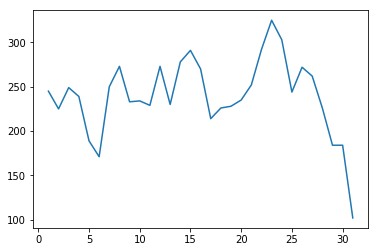

In [112]:
df.day.value_counts().sort_index().plot()

In [113]:
df.statdate.value_counts().sort_index()

2017-04-27    11
2017-04-28    11
2017-04-29    13
2017-04-30    12
2017-05-01    19
2017-05-02    13
2017-05-03    22
2017-05-04    52
2017-05-05    12
2017-05-07    26
2017-05-08    38
2017-05-09    17
2017-05-10    21
2017-05-11    21
2017-05-12    46
2017-05-13    11
2017-05-14    16
2017-05-15    48
2017-05-16    20
2017-05-17    13
2017-05-18    14
2017-05-19    13
2017-05-20     8
2017-05-22    21
2017-05-23    37
2017-05-24    59
2017-05-25     6
2017-06-07    16
2017-06-08    27
2017-06-09    17
              ..
2018-03-04    23
2018-03-05    18
2018-03-06    20
2018-03-07    27
2018-03-08    25
2018-03-09    27
2018-03-10    20
2018-03-11    21
2018-03-12    20
2018-03-13    28
2018-03-14    28
2018-03-15    28
2018-03-16    28
2018-03-17    12
2018-03-18    23
2018-03-19    44
2018-03-20    31
2018-03-21    26
2018-03-22    29
2018-03-23     5
2018-04-19     9
2018-04-20    18
2018-04-21    18
2018-04-22    20
2018-04-23    20
2018-04-24    40
2018-04-25    22
2018-04-26    

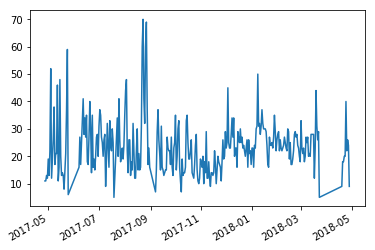

In [114]:
df.statdate.value_counts().sort_index().plot()

In [115]:
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,南沙区,从化区,增城区,是否包含表情,length,阴历,星期,是否周中或周末,是否上班或节假日,day
0,1149,2017-04-27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,10,27初二,四,周中,NaN,27
1,1150,2017-04-27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,2,27初二,四,周中,NaN,27
2,1151,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN,27
3,1152,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN,27
4,1153,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN,27


In [116]:
df.drop('day', axis=1, inplace=True)

In [117]:
df.head()

,id,statdate,text,所属分类,预报内容,预警内容,预警级别,预警信号,微博种类,是否包含链接,...,番禺区,南沙区,从化区,增城区,是否包含表情,length,阴历,星期,是否周中或周末,是否上班或节假日
0,1149,2017-04-27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,10,27初二,四,周中,NaN
1,1150,2017-04-27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,2,27初二,四,周中,NaN
2,1151,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
3,1152,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN
4,1153,2017-04-27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,NaN,NaN,NaN,NaN,NaN,4,27初二,四,周中,NaN


In [119]:
df.to_csv('clustered_labelled.csv', encoding='gb18030')